In [1]:
import sys
import pprint
from pathlib import Path
project_root = str(Path.cwd().parent)
if project_root not in sys.path:
 sys.path.append(project_root)
 
from pipeline.utils.general import load_json_data
from pipeline.utils.path_manager import PathManager
from evaluation.analysis.tail_posture_analysis.tail_posture_analyzer import TailPostureAnalyzer
from evaluation.analysis.early_warning_analysis.early_warning_analysis import EarlyWarningAnalyzer 

path_manager = PathManager()

## Load config

In [2]:
config_tail_posture_evaluation = load_json_data('configs/config_tail_posture.json')

pprint.pprint(config_tail_posture_evaluation, compact=True)

{'analysis_window_days': [1, 3, 5, 7],
 'comparison_metrics': ['value_at_removal', '1d_window_avg', '3d_window_avg',
                        '5d_window_avg', '7d_window_avg', '1d_window_slope',
                        '3d_window_slope', '5d_window_slope', '7d_window_slope',
                        'abs_change_1d', 'abs_change_3d', 'abs_change_5d',
                        'abs_change_7d'],
 'comparison_stats_filename': 'outbreak_vs_control_comparison.csv',
 'component_analysis_window_days': 10,
 'component_timepoint_days': [0, 1, 3, 5, 7],
 'confidence_level': 0.95,
 'control_components_filename': 'control_posture_components.csv',
 'control_date_margin': 5,
 'control_samples_per_pen': 5,
 'control_stats_filename': 'control_statistics.csv',
 'days_before_list': [1, 3, 5, 7],
 'figure_dpi': 600,
 'interpolate_resampled_data': True,
 'max_allowed_consecutive_missing_days': 3,
 'max_allowed_missing_days_pct': 50.0,
 'min_control_analysis_dates': 2,
 'min_control_dates_threshold': 8,
 'min_o

## Run analysis

In [3]:
# Initialize the analyzer with your config
analyzer = TailPostureAnalyzer(config_tail_posture_evaluation)

# Load and preprocess data
analyzer.load_data()

# Preprocess the data
analyzer.preprocess_monitoring_results()

# Run standard analyses
analyzer.analyze_pre_outbreak_statistics()
analyzer.analyze_control_pen_statistics()
analyzer.compare_outbreak_vs_control_statistics()
analyzer.analyze_individual_outbreak_variation()
analyzer.analyze_posture_components()

2025-07-09 10:46:26,639 - INFO - Loading monitoring pipeline data...
2025-07-09 10:46:33,084 - WARNING - Missing 1 day(s) for Kamera5/221004_221104: [datetime.date(2022, 11, 3)]
2025-07-09 10:46:35,104 - WARNING - Missing 17 day(s) for Kamera5/220510_220529: [datetime.date(2022, 5, 10), datetime.date(2022, 5, 12), datetime.date(2022, 5, 14), datetime.date(2022, 5, 15), datetime.date(2022, 5, 16), datetime.date(2022, 5, 18), datetime.date(2022, 5, 19), datetime.date(2022, 5, 20), datetime.date(2022, 5, 21), datetime.date(2022, 5, 22), datetime.date(2022, 5, 23), datetime.date(2022, 5, 24), datetime.date(2022, 5, 25), datetime.date(2022, 5, 26), datetime.date(2022, 5, 27), datetime.date(2022, 5, 28), datetime.date(2022, 5, 29)]
2025-07-09 10:46:35,115 - WARNING - Dataframe became empty after time filtering: Kamera5_2022_05_11_08_18_23-09_18_23.csv. Skipping.
2025-07-09 10:46:35,126 - WARNING - Dataframe became empty after time filtering: Kamera5_2022_05_13_08_18_21-09_18_21.csv. Skipping

{'outbreak_components':        pen       datespan  days_before_removal       date  upright_tails  \
 0    Pen 1  220228_220328                    0 2022-03-23       0.387648   
 1    Pen 1  220228_220328                    1 2022-03-22       0.528087   
 2    Pen 1  220228_220328                    2 2022-03-21       0.682334   
 3    Pen 1  220228_220328                    3 2022-03-20       0.767497   
 4    Pen 1  220228_220328                    4 2022-03-19       0.855052   
 ..     ...            ...                  ...        ...            ...   
 215  Pen 6  230515_230622                    6 2023-05-26       0.802259   
 216  Pen 6  230515_230622                    7 2023-05-25       0.791398   
 217  Pen 6  230515_230622                    8 2023-05-24       0.787130   
 218  Pen 6  230515_230622                    9 2023-05-23       0.783088   
 219  Pen 6  230515_230622                   10 2023-05-22       0.783680   
 
      hanging_tails  posture_diff     group  
 0   

## Load early warning config

In [4]:
# early warning analysis
config_early_warning_analysis = load_json_data('configs/config_early_warning.json')

pprint.pprint(config_early_warning_analysis, compact=True)

{'default_threshold_sets': [{'thresholds': {'alert': {'posture_diff': 0.4},
                                            'attention': {'posture_diff': 0.5},
                                            'critical': {'posture_diff': 0.25}}}],
 'details_filename': 'early_warning_pen_details.csv',
 'ignore_first_percent': 20,
 'max_percent_before': 60,
 'optimization_filename': 'threshold_optimization_results.csv',
 'output_dir': 'results/results_early_warning_evaluation/daily',
 'random_seed': 42,
 'summary_filename': 'early_warning_evaluation.csv',
 'thresholds': {'alert': {'posture_diff': 0.4},
                'attention': {'posture_diff': 0.5},
                'critical': {'posture_diff': 0.25}},
 'use_interpolated_data': False}


## Run early warning analysis

In [5]:
evaluator = EarlyWarningAnalyzer(analyzer, config=config_early_warning_analysis)
warning_evaluation = evaluator.evaluate_thresholds()

2025-07-09 10:48:06,579 - INFO - EarlyWarningAnalyzer initialized with configuration:
2025-07-09 10:48:06,579 - INFO -   random_seed: 42
2025-07-09 10:48:06,580 - INFO -   use_interpolated_data: False
2025-07-09 10:48:06,580 - INFO -   max_percent_before: 60
2025-07-09 10:48:06,580 - INFO -   ignore_first_percent: 20
2025-07-09 10:48:06,581 - INFO -   thresholds: {'attention': {'posture_diff': 0.5}, 'alert': {'posture_diff': 0.4}, 'critical': {'posture_diff': 0.25}}
2025-07-09 10:48:06,581 - INFO -   output_dir: results/results_early_warning_evaluation/daily
2025-07-09 10:48:06,581 - INFO -   summary_filename: early_warning_evaluation.csv
2025-07-09 10:48:06,582 - INFO -   details_filename: early_warning_pen_details.csv
2025-07-09 10:48:06,582 - INFO -   optimization_filename: threshold_optimization_results.csv
2025-07-09 10:48:06,582 - INFO - Evaluating early warning thresholds...
2025-07-09 10:48:06,583 - INFO - Ignoring first 20% of each run
2025-07-09 10:48:06,583 - INFO - Using ma

In [6]:
# Print key results
print("\nEarly Warning System Evaluation Results:")
print("----------------------------------------")
print(f"Attention Level - Sensitivity: {warning_evaluation['attention_level']['metrics']['sensitivity']:.2f}")
print(f"Attention Level - Specificity: {warning_evaluation['attention_level']['metrics']['specificity']:.2f}")
print(f"Attention Level - Average Warning Time: {warning_evaluation['attention_level']['avg_days_before_outbreak']:.1f} days")

print("----------------------------------------")
print(f"Alert Level - Sensitivity: {warning_evaluation['alert_level']['metrics']['sensitivity']:.2f}")
print(f"Alert Level - Specificity: {warning_evaluation['alert_level']['metrics']['specificity']:.2f}")
print(f"Alert Level - Average Warning Time: {warning_evaluation['alert_level']['avg_days_before_outbreak']:.1f} days")

print("----------------------------------------")
print(f"Critical Level - Sensitivity: {warning_evaluation['critical_level']['metrics']['sensitivity']:.2f}")
print(f"Critical Level - Specificity: {warning_evaluation['critical_level']['metrics']['specificity']:.2f}")
print(f"Critical Level - Average Warning Time: {warning_evaluation['critical_level']['avg_days_before_outbreak']:.1f} days")


Early Warning System Evaluation Results:
----------------------------------------
Attention Level - Sensitivity: 0.90
Attention Level - Specificity: 0.70
Attention Level - Average Warning Time: 4.6 days
----------------------------------------
Alert Level - Sensitivity: 0.85
Alert Level - Specificity: 0.85
Alert Level - Average Warning Time: 4.1 days
----------------------------------------
Critical Level - Sensitivity: 0.80
Critical Level - Specificity: 0.90
Critical Level - Average Warning Time: 3.5 days


In [7]:
# Evaluate all levels (default behavior)
all_results = evaluator.evaluate_thresholds()

# Evaluate only attention level
attention_results = evaluator.evaluate_thresholds(include_levels=['attention'])

# Evaluate alert and critical levels together
alert_critical_results = evaluator.evaluate_thresholds(include_levels=['alert', 'critical'])

# Evaluate each level individually for comparison
attention_only = evaluator.evaluate_thresholds(include_levels=['attention'])
alert_only = evaluator.evaluate_thresholds(include_levels=['alert'])
critical_only = evaluator.evaluate_thresholds(include_levels=['critical'])

2025-07-09 10:48:06,735 - INFO - Evaluating early warning thresholds...
2025-07-09 10:48:06,736 - INFO - Ignoring first 20% of each run
2025-07-09 10:48:06,736 - INFO - Using maximum lookback of 60% of each run's duration (from the end)
2025-07-09 10:48:06,737 - INFO - Including the following threshold levels in evaluation: ['attention', 'alert', 'critical']
2025-07-09 10:48:06,738 - INFO - Using max_percent_before: 60% of each run's duration (from the end)
2025-07-09 10:48:06,738 - INFO - Using resampled_data for threshold evaluation
2025-07-09 10:48:06,740 - INFO - For pen Pen 1 / 220228_220328, ignoring first 20% (5 points). Analysis starts from: 2022-03-05 00:00:00
2025-07-09 10:48:06,740 - INFO - For pen Pen 1 / 220228_220328, max lookback period is 13 days (60% of total duration from the end)
2025-07-09 10:48:06,745 - INFO - For pen Pen 1 / 221003_221106, ignoring first 20% (7 points). Analysis starts from: 2022-10-10 00:00:00
2025-07-09 10:48:06,745 - INFO - For pen Pen 1 / 2210

In [8]:
evaluator.print_threshold_analysis_results(all_results)


=== EARLY WARNING SYSTEM EVALUATION SUMMARY ===
Total pens analyzed: 40 (20 outbreak, 20 control)
Threshold levels included: attention, alert, critical

Level      | Sens.      | Spec.      | Prec.      | F1         | Avg Warning     | Med Warning    
------------------------------------------------------------------------------------------
Attention  | 0.90       | 0.70       | 0.75       | 0.82       | 4.6d            | 2.0d           
Alert      | 0.85       | 0.85       | 0.85       | 0.85       | 4.1d            | 2.0d           
Critical   | 0.80       | 0.90       | 0.89       | 0.84       | 3.5d            | 2.0d           

=== CONFUSION MATRIX INFORMATION ===

Attention Level:
  True Positives:  18 (Outbreak pen correctly flagged)
  False Positives: 6 (Control pen incorrectly flagged)
  True Negatives:  14 (Control pen correctly not flagged)
  False Negatives: 2 (Outbreak pen incorrectly not flagged)

Alert Level:
  True Positives:  17 (Outbreak pen correctly flagged)
  Fals

### Run analysis with interpolated Data

In [9]:
# early warning analysis
config_early_warning_analysis = load_json_data('configs/config_early_warning.json')
config_early_warning_analysis['use_interpolated_data'] = True
config_early_warning_analysis['output_dir'] = "results_early_warning_evaluation/hourly"

pprint.pprint(config_early_warning_analysis, compact=True)

{'default_threshold_sets': [{'thresholds': {'alert': {'posture_diff': 0.4},
                                            'attention': {'posture_diff': 0.5},
                                            'critical': {'posture_diff': 0.25}}}],
 'details_filename': 'early_warning_pen_details.csv',
 'ignore_first_percent': 20,
 'max_percent_before': 60,
 'optimization_filename': 'threshold_optimization_results.csv',
 'output_dir': 'results_early_warning_evaluation/hourly',
 'random_seed': 42,
 'summary_filename': 'early_warning_evaluation.csv',
 'thresholds': {'alert': {'posture_diff': 0.4},
                'attention': {'posture_diff': 0.5},
                'critical': {'posture_diff': 0.25}},
 'use_interpolated_data': True}


In [10]:
evaluator = EarlyWarningAnalyzer(analyzer, config=config_early_warning_analysis)
all_results = evaluator.evaluate_thresholds()
evaluator.print_threshold_analysis_results(all_results)

2025-07-09 10:48:07,587 - INFO - EarlyWarningAnalyzer initialized with configuration:
2025-07-09 10:48:07,588 - INFO -   random_seed: 42
2025-07-09 10:48:07,588 - INFO -   use_interpolated_data: True
2025-07-09 10:48:07,589 - INFO -   max_percent_before: 60
2025-07-09 10:48:07,589 - INFO -   ignore_first_percent: 20
2025-07-09 10:48:07,589 - INFO -   thresholds: {'attention': {'posture_diff': 0.5}, 'alert': {'posture_diff': 0.4}, 'critical': {'posture_diff': 0.25}}
2025-07-09 10:48:07,590 - INFO -   output_dir: results_early_warning_evaluation/hourly
2025-07-09 10:48:07,590 - INFO -   summary_filename: early_warning_evaluation.csv
2025-07-09 10:48:07,590 - INFO -   details_filename: early_warning_pen_details.csv
2025-07-09 10:48:07,591 - INFO -   optimization_filename: threshold_optimization_results.csv
2025-07-09 10:48:07,591 - INFO - Evaluating early warning thresholds...
2025-07-09 10:48:07,591 - INFO - Ignoring first 20% of each run
2025-07-09 10:48:07,592 - INFO - Using maximum lo


=== EARLY WARNING SYSTEM EVALUATION SUMMARY ===
Total pens analyzed: 40 (20 outbreak, 20 control)
Threshold levels included: attention, alert, critical

Level      | Sens.      | Spec.      | Prec.      | F1         | Avg Warning     | Med Warning    
------------------------------------------------------------------------------------------
Attention  | 0.85       | 0.75       | 0.77       | 0.81       | 5d 10.0h        | 3d 8.0h        
Alert      | 0.85       | 0.85       | 0.85       | 0.85       | 4d 18.0h        | 3d 1.0h        
Critical   | 0.80       | 0.90       | 0.89       | 0.84       | 3d 5.9h         | 2d 14.5h       

=== CONFUSION MATRIX INFORMATION ===

Attention Level:
  True Positives:  17 (Outbreak pen correctly flagged)
  False Positives: 5 (Control pen incorrectly flagged)
  True Negatives:  15 (Control pen correctly not flagged)
  False Negatives: 3 (Outbreak pen incorrectly not flagged)

Alert Level:
  True Positives:  17 (Outbreak pen correctly flagged)
  Fals

### Visualizations

2025-07-09 10:48:09,571 - INFO - Setting plot style: Font=serif, BaseSize=11pt, Format=png, DPI=600


INFO: EarlyWarningVisualizer initialized. Visualizations will be saved to results_early_warning_evaluation/hourly/visualizations
INFO: Confusion matrix heatmap saved to results_early_warning_evaluation/hourly/visualizations/confusion_matrix_heatmap_attention_alert_critical.png


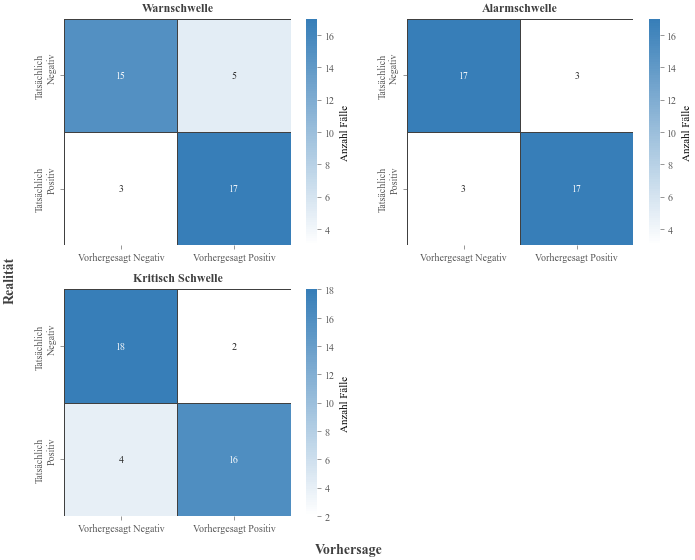

INFO: Detailed confusion matrix plot saved to results_early_warning_evaluation/hourly/visualizations/confusion_matrix_detailed_attention_alert_critical.png


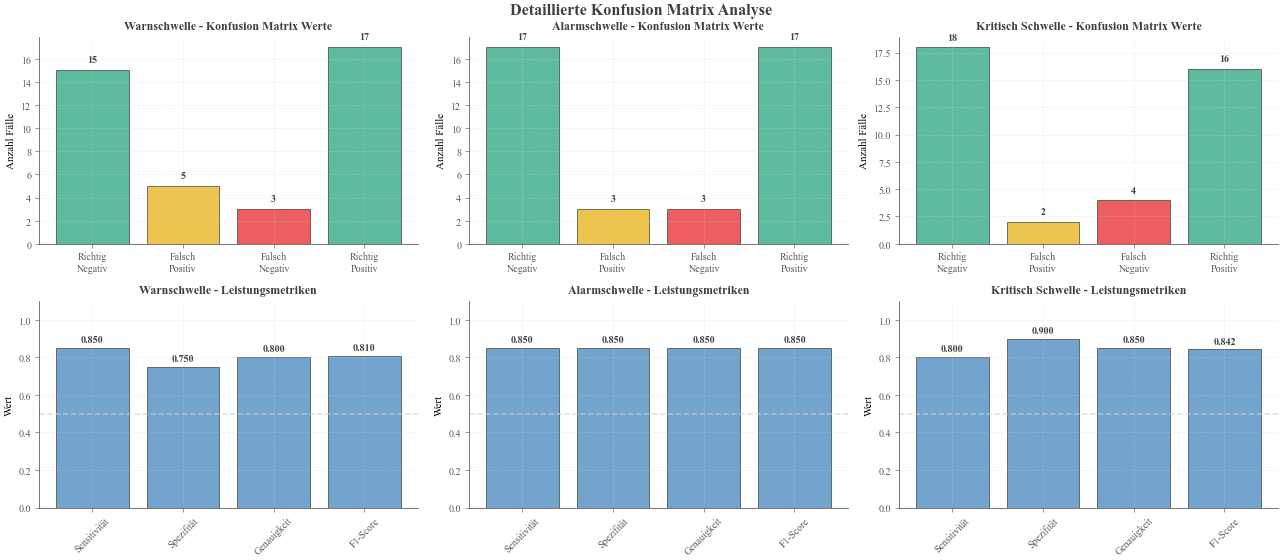

INFO: Metrics comparison plot saved to results_early_warning_evaluation/hourly/visualizations/metrics_comparison_attention_alert_critical.png


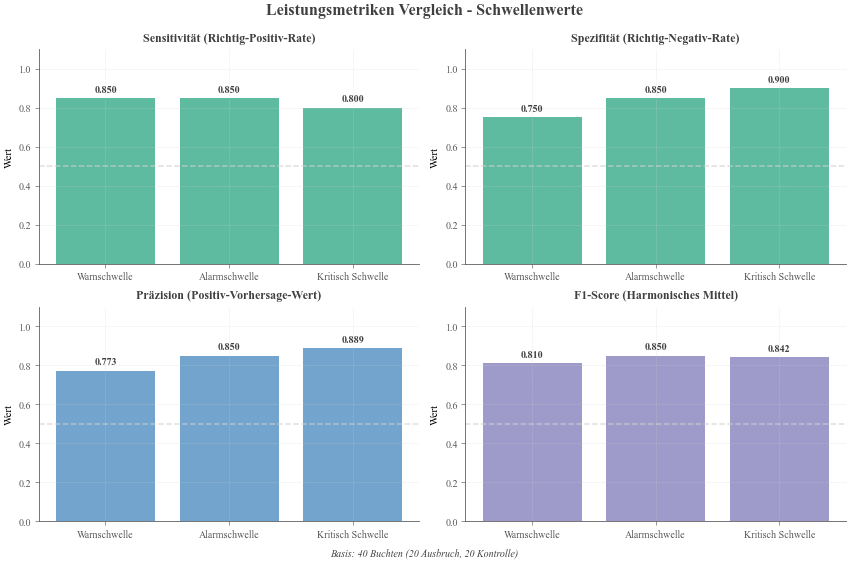

INFO: ROC curve plot saved to results_early_warning_evaluation/hourly/visualizations/roc_curve_attention_alert_critical.png


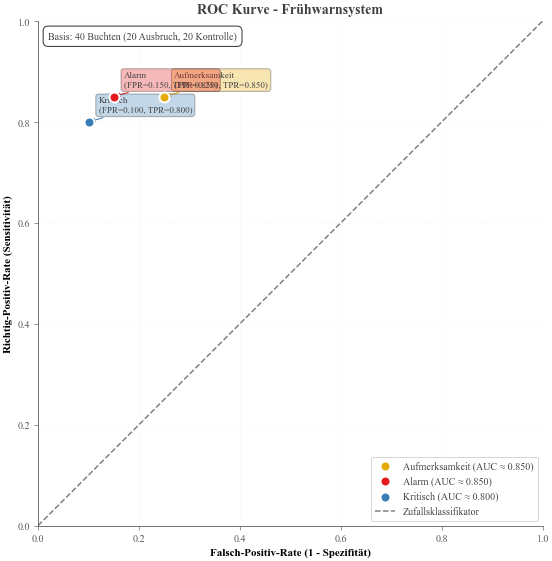

In [11]:
from evaluation.analysis.early_warning_analysis.early_warning_visualization import EarlyWarningVisualizer

visualizer  = EarlyWarningVisualizer(evaluator)

# Heatmap der Konfusion Matrizen
fig1 = visualizer.visualize_confusion_matrix(all_results, 'heatmap', show_plot=True)

# Detaillierte Subplot-Ansicht
fig2 = visualizer.visualize_confusion_matrix(all_results, 'subplots', show_plot=True)

# Metriken-Vergleich
fig3 = visualizer.visualize_confusion_matrix(all_results, 'metrics_comparison', show_plot=True)

# ROC-Kurve
fig4 = visualizer.visualize_roc_curve(all_results, show_plot=True)

In [12]:
from evaluation.analysis.early_warning_analysis.early_warning_visualization import EarlyWarningVisualizer

vis = EarlyWarningVisualizer(evaluator)

vis.visualize_all_pens()

2025-07-09 10:57:55,367 - INFO - Setting plot style: Font=serif, BaseSize=11pt, Format=png, DPI=600


INFO: EarlyWarningVisualizer initialized. Visualizations will be saved to results_early_warning_evaluation/hourly/visualizations
INFO: Creating visualization for pen Pen 2 / 230227_230405
INFO: Visualization saved to results_early_warning_evaluation/hourly/visualizations/Pen_2_230227_230405_control_early_warning.png
INFO: Creating visualization for pen Pen 2 / 220725_220831
INFO: Visualization saved to results_early_warning_evaluation/hourly/visualizations/Pen_2_220725_220831_control_early_warning.png
INFO: Creating visualization for pen Pen 1 / 221219_230125
INFO: Visualization saved to results_early_warning_evaluation/hourly/visualizations/Pen_1_221219_230125_tail_biting_early_warning.png
INFO: Creating visualization for pen Pen 4 / 211229_220119
INFO: Visualization saved to results_early_warning_evaluation/hourly/visualizations/Pen_4_211229_220119_control_early_warning.png
INFO: Creating visualization for pen Pen 5 / 220725_220831
INFO: Visualization saved to results_early_warning_e

[<Figure size 864x576 with 1 Axes>,
 <Figure size 864x576 with 1 Axes>,
 <Figure size 864x576 with 1 Axes>,
 <Figure size 864x576 with 1 Axes>,
 <Figure size 864x576 with 1 Axes>,
 <Figure size 864x576 with 1 Axes>,
 <Figure size 864x576 with 1 Axes>,
 <Figure size 864x576 with 1 Axes>,
 <Figure size 864x576 with 1 Axes>,
 <Figure size 864x576 with 1 Axes>,
 <Figure size 864x576 with 1 Axes>,
 <Figure size 864x576 with 1 Axes>,
 <Figure size 864x576 with 1 Axes>,
 <Figure size 864x576 with 1 Axes>,
 <Figure size 864x576 with 1 Axes>,
 <Figure size 864x576 with 1 Axes>,
 <Figure size 864x576 with 1 Axes>,
 <Figure size 864x576 with 1 Axes>,
 <Figure size 864x576 with 1 Axes>,
 <Figure size 864x576 with 1 Axes>,
 <Figure size 864x576 with 1 Axes>,
 <Figure size 864x576 with 1 Axes>,
 <Figure size 864x576 with 1 Axes>,
 <Figure size 864x576 with 1 Axes>,
 <Figure size 864x576 with 1 Axes>,
 <Figure size 864x576 with 1 Axes>,
 <Figure size 864x576 with 1 Axes>,
 <Figure size 864x576 with 1

2025-07-09 10:59:32,511 - INFO - Setting plot style: Font=serif, BaseSize=11pt, Format=png, DPI=600


INFO: EarlyWarningVisualizer initialized. Visualizations will be saved to results_early_warning_evaluation/hourly/visualizations
INFO: Clean visualization saved to results_early_warning_evaluation/hourly/visualizations/Pen_1_211228_220119_control_clean.png


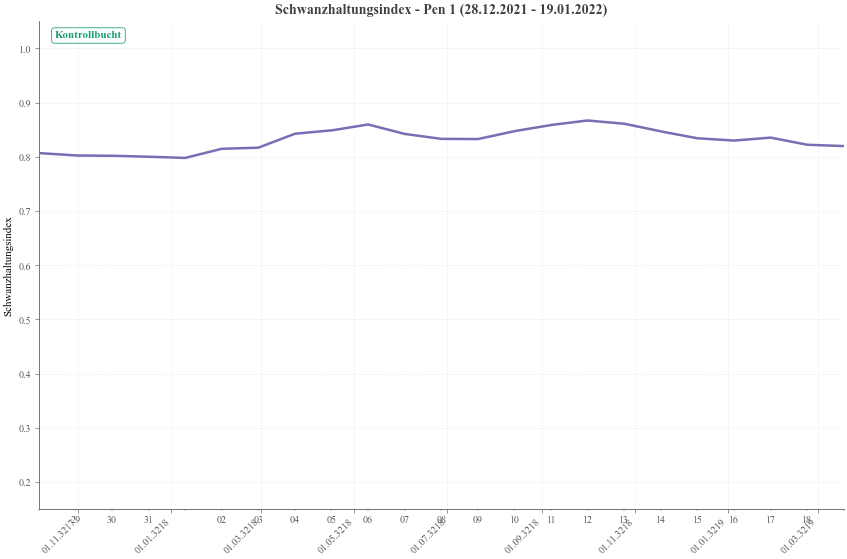

In [13]:
from evaluation.analysis.early_warning_analysis.early_warning_visualization import EarlyWarningVisualizer

vis = EarlyWarningVisualizer(evaluator)

fig = vis.visualize_pen_clean(
    pen="Pen 1", 
    datespan="211228_220119",
    save_plot=True,
    show_plot=True
)

INFO: Visualization saved to results_early_warning_evaluation/hourly/visualizations/Pen_1_220228_220328_tail_biting_early_warning.png


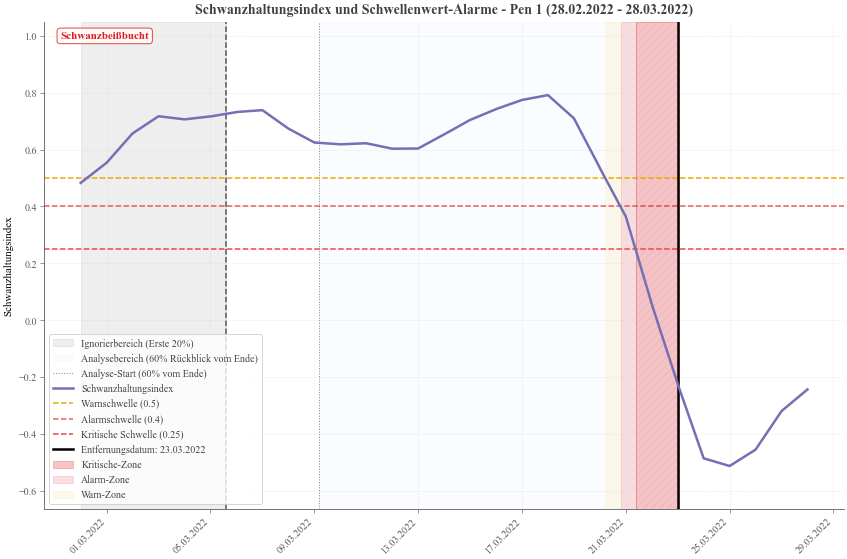

In [15]:
fig = vis.visualize_pen(
    pen="Pen 1", 
    datespan="220228_220328",
    save_plot=True,
    show_plot=True
)